# Simages Demo

- [Getting Started](#getting_started)
- [Numpy Array](#numpy_array)
- [Image Folder](#image_folder)
  - Find similar images ([Beaches](#beaches))
  - Find duplicates ([Balloons](#balloons))
  - Find `n` closest pairs ([EmbeddingExtractor](#extractor))

<a id='getting_started'></a>
## Getting Started

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import simages
from simages import find_duplicates

<a id='numpy_arrays'></a>
## Numpy Arrays

If your data is already in numpy arrays, otherwise, skip to [Image Folder](#image_folder)

INFO:simages.extractor:Note: No GPU found, using CPU. Performance is improved on a CUDA-device.


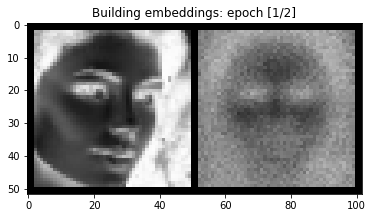

INFO:simages.extractor:epoch [1/2], loss:0.0430


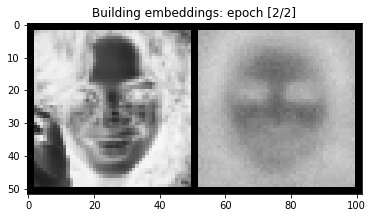

INFO:simages.extractor:epoch [2/2], loss:0.0383


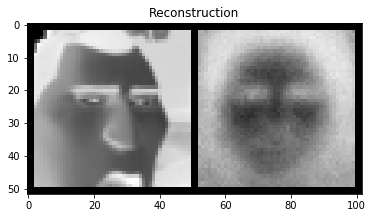

INFO:simages.extractor:eval, loss:0.0254


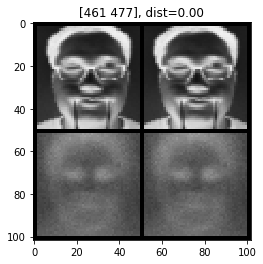

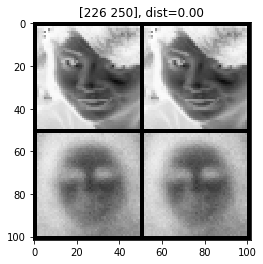

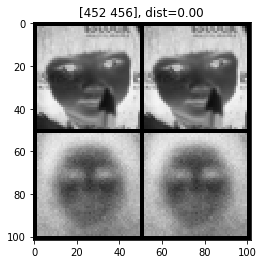

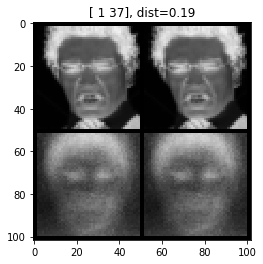

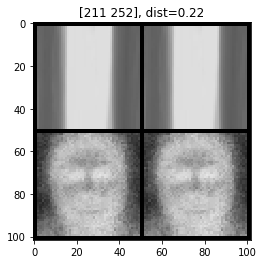

In [2]:
data = np.load("images/data.npy")
data = data[:, np.newaxis, ...] # N x C x H x W
pairs, distances = find_duplicates(data, num_channels=1, show=True, show_train=True)

<a id='image_folder'></a>

## Image Folder

In [1]:
# download some images
# !pip install chromedriver_installer
# !pip install google_images_download

from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords":"Balloons,Beaches","limit":100,"print_urls":False}
paths = response.download(arguments)


Item no.: 1 --> Item name = Balloons
Evaluating...
Starting Download...
Invalid or missing image format. Skipping...
Completed Image ====> 1.51zwIl630bL._SX425_.jpg
Completed Image ====> 2.419J7jTYX4L._SY355_.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 3.untitled-untitled-IMG_7342_e1143013-eda0-4fc8-a813-a030c32bdcf3_grande.jpg
URLError on an image...trying next one... Error: <urlopen error [Errno 61] Connection refused>
Completed Image ====> 4.happy-birthday-balloons-5a9833d0aaa20.425.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 5.c828c45e-cae2-47d5-a044-a5a386212cd7._CR6,0,738,984_PT0_SX300__.jpg
Completed Image ====> 6.AdobeStock_63338431.jpeg
Completed Image ====> 7.e30b5809-fe1a-47e7-bc65-82db24aee688_1.1687e4b8746664a7a765cbe8c32eec94.jpeg
Completed Image ====> 8.51ZPtIeBk5L._SX425_.jpg
Completed Image ====> 9.10039_1.jpg
Completed Image ====> 10.11169640-bright-balloons-isolated-on-white.jpg
Completed Image ====> 11.509116_10

Completed Image ====> 25.GettyImages-1069702720-5c13fbc146e0fb000140706d.jpg
Completed Image ====> 26.header-beach-2017.jpg
Completed Image ====> 27.Beaches_radio_beach_HiRes.jpg
Completed Image ====> 28.shutterstock_517581616-870x400.jpg
Completed Image ====> 29.beaches-barcelona.jpeg
Completed Image ====> 30.phuket-romantic-beaches.jpg
Completed Image ====> 31.white-beach-boracay.jpg
Completed Image ====> 32.Beaches_radio_beach0_HiRes.jpg
Completed Image ====> 33.Florida-Secret-Beaches.jpg
Completed Image ====> 34.slideshow-1527585658.jpg
Completed Image ====> 35.sicily-beach-1509079879-1000X561.jpeg
Completed Image ====> 36.shutterstock_757257655.jpg
Completed Image ====> 37.http%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190523102340-10-best-beaches-united-states-restrictred.jpg
Completed Image ====> 38.gn-gift_guide_variable_c.jpg
Completed Image ====> 39.maxresdefault.jpg
Completed Image ====> 40.IMG_8727-min-e1501519234991.jpg
Completed Image ====> 41.5104226627001_574324545

<a id='beaches'></a>

### Find similar images (Beaches)
In a dataset without duplicates, `find_duplicates` will show the most similar images

INFO:simages.extractor:Note: No GPU found, using CPU. Performance is improved on a CUDA-device.


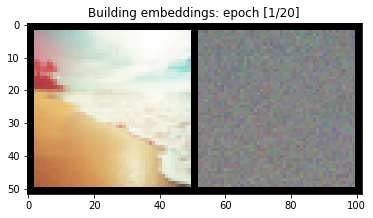

INFO:simages.extractor:epoch [1/20], loss:0.0956


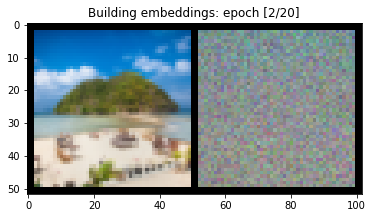

INFO:simages.extractor:epoch [2/20], loss:0.0683


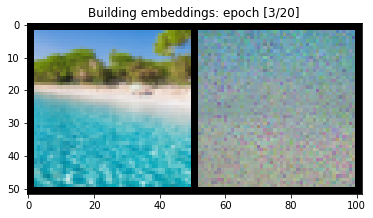

INFO:simages.extractor:epoch [3/20], loss:0.0823


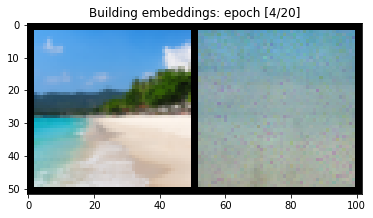

INFO:simages.extractor:epoch [4/20], loss:0.0664


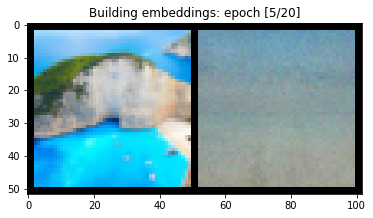

INFO:simages.extractor:epoch [5/20], loss:0.0640


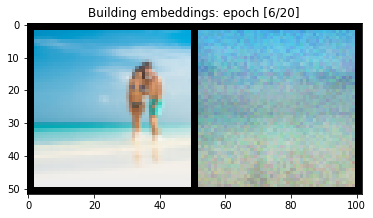

INFO:simages.extractor:epoch [6/20], loss:0.0371


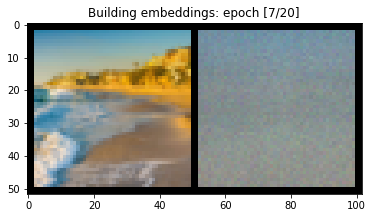

INFO:simages.extractor:epoch [7/20], loss:0.0229


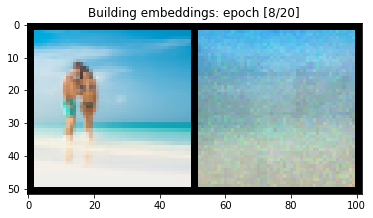

INFO:simages.extractor:epoch [8/20], loss:0.0478


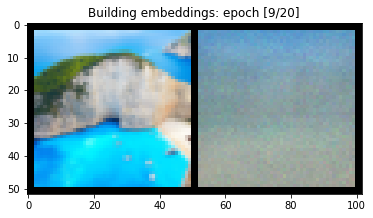

INFO:simages.extractor:epoch [9/20], loss:0.0547


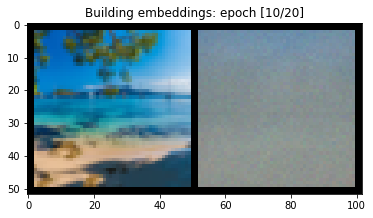

INFO:simages.extractor:epoch [10/20], loss:0.0545


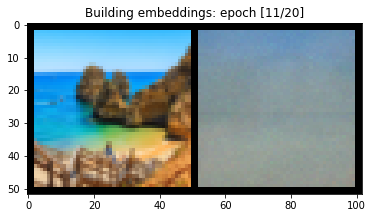

INFO:simages.extractor:epoch [11/20], loss:0.0890


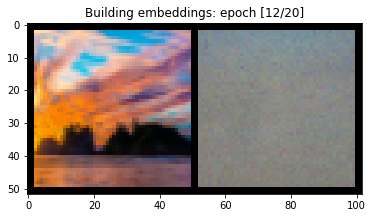

INFO:simages.extractor:epoch [12/20], loss:0.0782


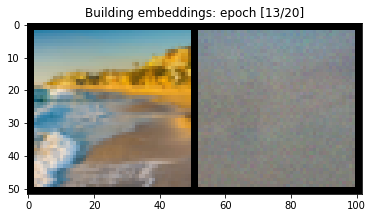

INFO:simages.extractor:epoch [13/20], loss:0.0231


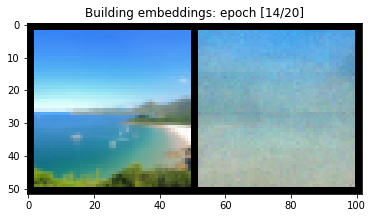

INFO:simages.extractor:epoch [14/20], loss:0.0362


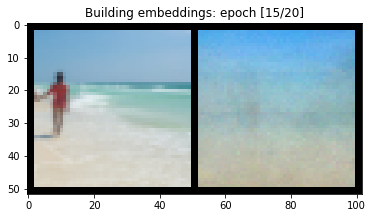

INFO:simages.extractor:epoch [15/20], loss:0.0434


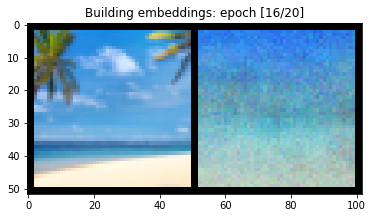

INFO:simages.extractor:epoch [16/20], loss:0.0446


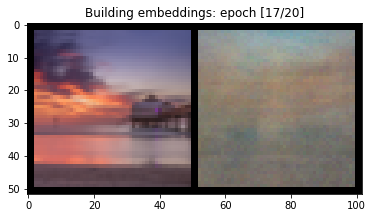

INFO:simages.extractor:epoch [17/20], loss:0.0342


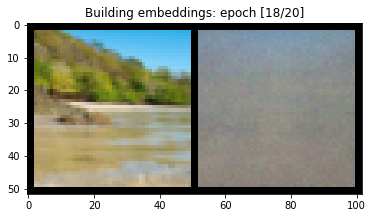

INFO:simages.extractor:epoch [18/20], loss:0.0426


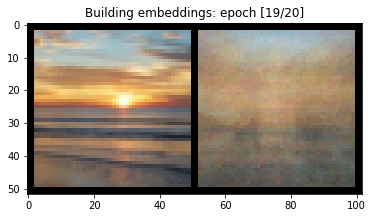

INFO:simages.extractor:epoch [19/20], loss:0.0310


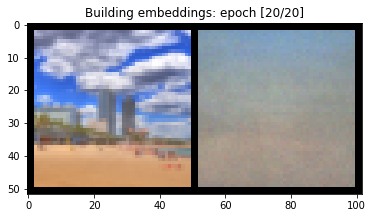

INFO:simages.extractor:epoch [20/20], loss:0.0358


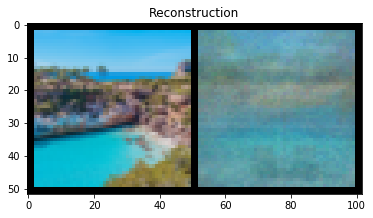

INFO:simages.extractor:eval, loss:0.0467


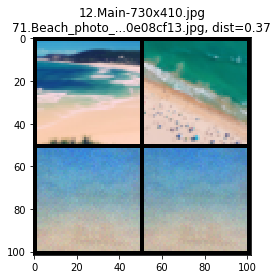

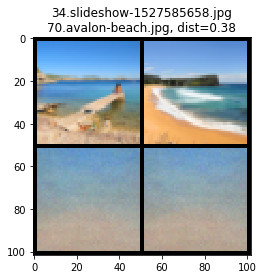

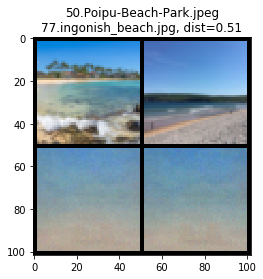

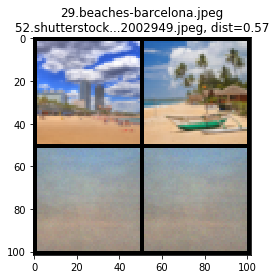

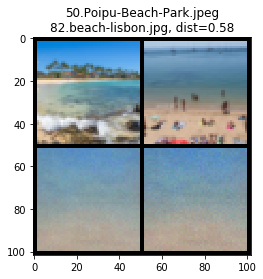

(array([[ 3, 68],
        [27, 67],
        [45, 74],
        [21, 47],
        [45, 80]]),
 array([0.37417887, 0.3784601 , 0.51362068, 0.56537968, 0.57956218]))

In [2]:
find_duplicates("downloads/Beaches", num_epochs=20, z=2, show=True, show_path=True, show_train=True)

<a id='balloons'></a>
### Find duplicates (Balloons)

INFO:simages.extractor:Skipping 58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png: cannot identify image file 'downloads/balloons/58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png'
INFO:simages.extractor:Skipping 58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png: cannot identify image file 'downloads/balloons/58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png'
INFO:simages.extractor:Note: No GPU found, using CPU. Performance is improved on a CUDA-device.


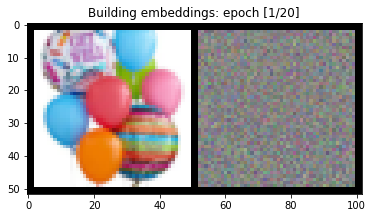

INFO:simages.extractor:epoch [1/20], loss:0.1347


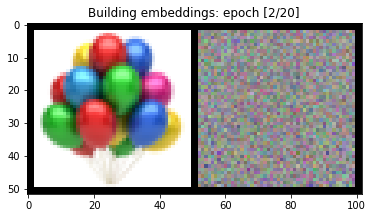

INFO:simages.extractor:epoch [2/20], loss:0.1268


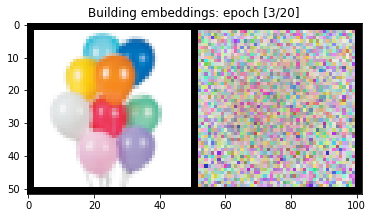

INFO:simages.extractor:epoch [3/20], loss:0.0985


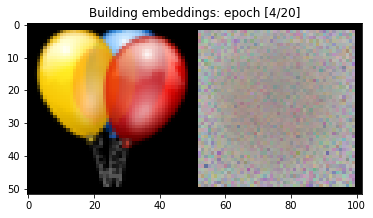

INFO:simages.extractor:epoch [4/20], loss:0.0728


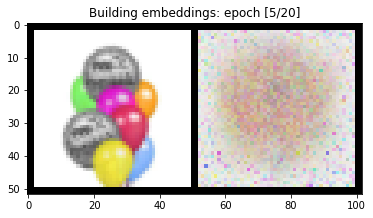

INFO:simages.extractor:epoch [5/20], loss:0.0949


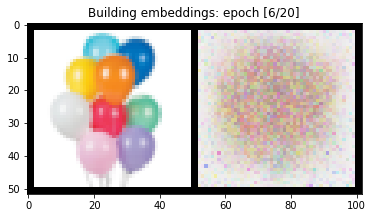

INFO:simages.extractor:epoch [6/20], loss:0.0628


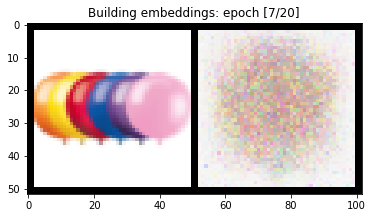

INFO:simages.extractor:epoch [7/20], loss:0.0753


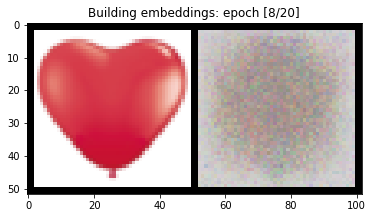

INFO:simages.extractor:epoch [8/20], loss:0.0690


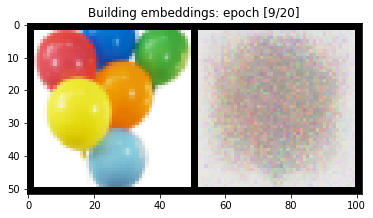

INFO:simages.extractor:epoch [9/20], loss:0.0614


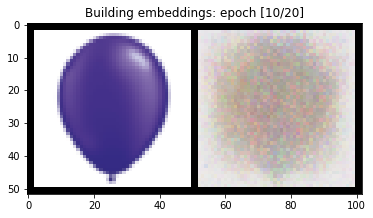

INFO:simages.extractor:epoch [10/20], loss:0.0620


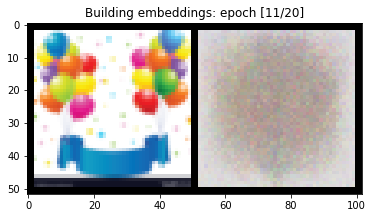

INFO:simages.extractor:epoch [11/20], loss:0.0678


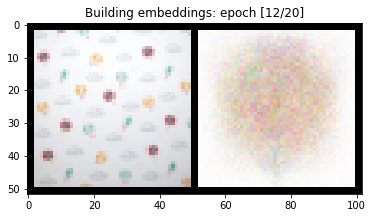

INFO:simages.extractor:epoch [12/20], loss:0.0543


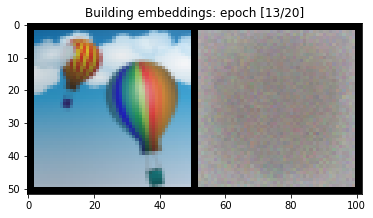

INFO:simages.extractor:epoch [13/20], loss:0.0623


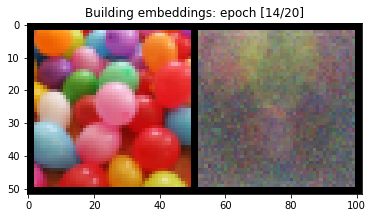

INFO:simages.extractor:epoch [14/20], loss:0.0755


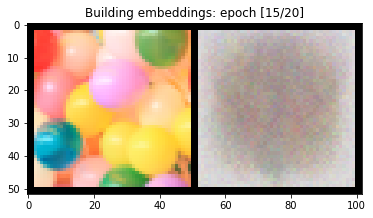

INFO:simages.extractor:epoch [15/20], loss:0.0639


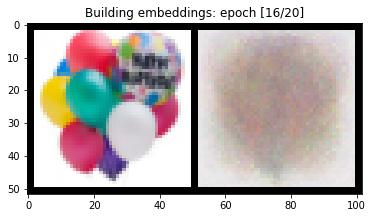

INFO:simages.extractor:epoch [16/20], loss:0.0590


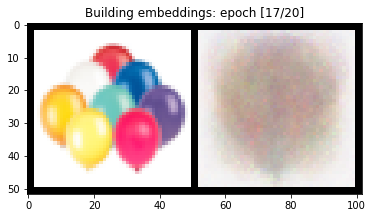

INFO:simages.extractor:epoch [17/20], loss:0.0492


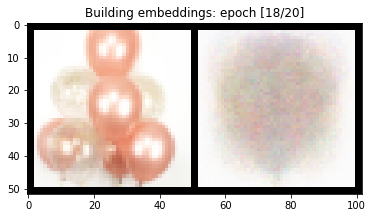

INFO:simages.extractor:epoch [18/20], loss:0.0579


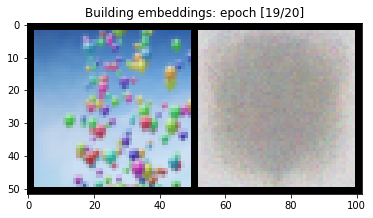

INFO:simages.extractor:epoch [19/20], loss:0.0555


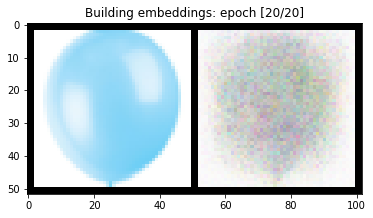

INFO:simages.extractor:epoch [20/20], loss:0.0420


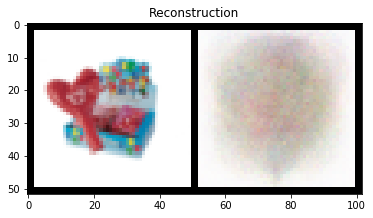

INFO:simages.extractor:eval, loss:0.0459


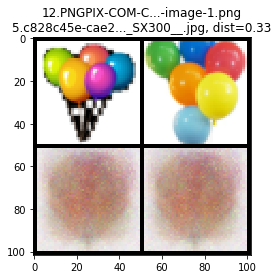

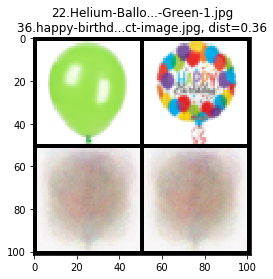

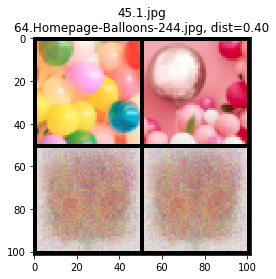

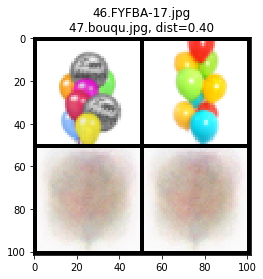

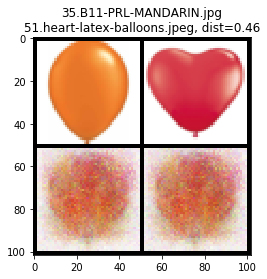

(array([[ 3, 44],
        [14, 29],
        [39, 59],
        [40, 41],
        [28, 46]]),
 array([0.33328883, 0.35832551, 0.39728753, 0.40477647, 0.45632541]))

In [5]:
find_duplicates("downloads/balloons", num_epochs=20, show=True, show_path=True, show_train=True)

<a id='#extractor'></a>
### Find `n` closest pairs with `EmbeddingExtractor`

In [6]:
from simages import EmbeddingExtractor

# Extract embeddings for futher analysis with `EmbeddingExtractor`
extractor = EmbeddingExtractor("downloads/balloons", num_epochs=10, z=2)

INFO:simages.extractor:Skipping 58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png: cannot identify image file 'downloads/balloons/58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png'
INFO:simages.extractor:Skipping 58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png: cannot identify image file 'downloads/balloons/58.Bunch_of_Balloons_Transparent_Clip_Art_PNG_Image.png'
INFO:simages.extractor:Note: No GPU found, using CPU. Performance is improved on a CUDA-device.
INFO:simages.extractor:epoch [1/10], loss:0.1243
INFO:simages.extractor:epoch [2/10], loss:0.1267
INFO:simages.extractor:epoch [3/10], loss:0.1060
INFO:simages.extractor:epoch [4/10], loss:0.0736
INFO:simages.extractor:epoch [5/10], loss:0.0630
INFO:simages.extractor:epoch [6/10], loss:0.0628
INFO:simages.extractor:epoch [7/10], loss:0.0519
INFO:simages.extractor:epoch [8/10], loss:0.0677
INFO:simages.extractor:epoch [9/10], loss:0.0565
INFO:simages.extractor:epoch [10/10], loss:0.0670
INFO:simages.extractor:eval

In [7]:
# Find `n` closest pairs of images with `duplicates`
pairs, distances = extractor.duplicates(n=10)

In [8]:
print("Pairs:\n", pairs)
print("Distances:\n", distances)

Pairs:
 [[ 3 35]
 [37 60]
 [40 67]
 [62 89]
 [ 0 14]
 [54 58]
 [ 1 29]
 [22 67]
 [67 77]
 [19 60]]
Distances:
 [0.13031906 0.13762056 0.16754089 0.17192613 0.17706505 0.19391107
 0.19600448 0.1986145  0.19946647 0.20029222]


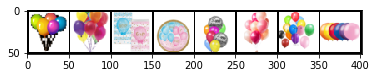

In [10]:
# Show images for corresponding `pairs` indices
extractor.show_images([3, 35, 37, 60, 40, 67, 62, 89])